HW
1) Part 2의 code를 수정해서 (Strong likelihood, Weak likelihood)  ×  (Uninformative prior, Weak prior, Strong prior)의 6가지 경우 비교해보기

In [2]:
import numpy as np
import scipy
import scipy.stats as st
from random import random
import inspect

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# likelihood 식을 정의한다
def likelihood(theta, n, y):
    return (theta**y)*((1-theta)**(n-y))

In [ ]:
# prior와 likelihood의 경우를 나눈다.
n=[20, 100]
y=[15, 75]

a = [1, 4, 20]
b = [1, 6, 30]

A=['Uniform prior', 'Weak prior', 'Strong prior']
B=['Strong likelihood', 'Weak likelihood']

thetas = np.linspace(0, 1, 500)
# Prior: beta(a=a0, b=b0)
# Posterior : beta(a=a0+y, b=b0+(n-y))

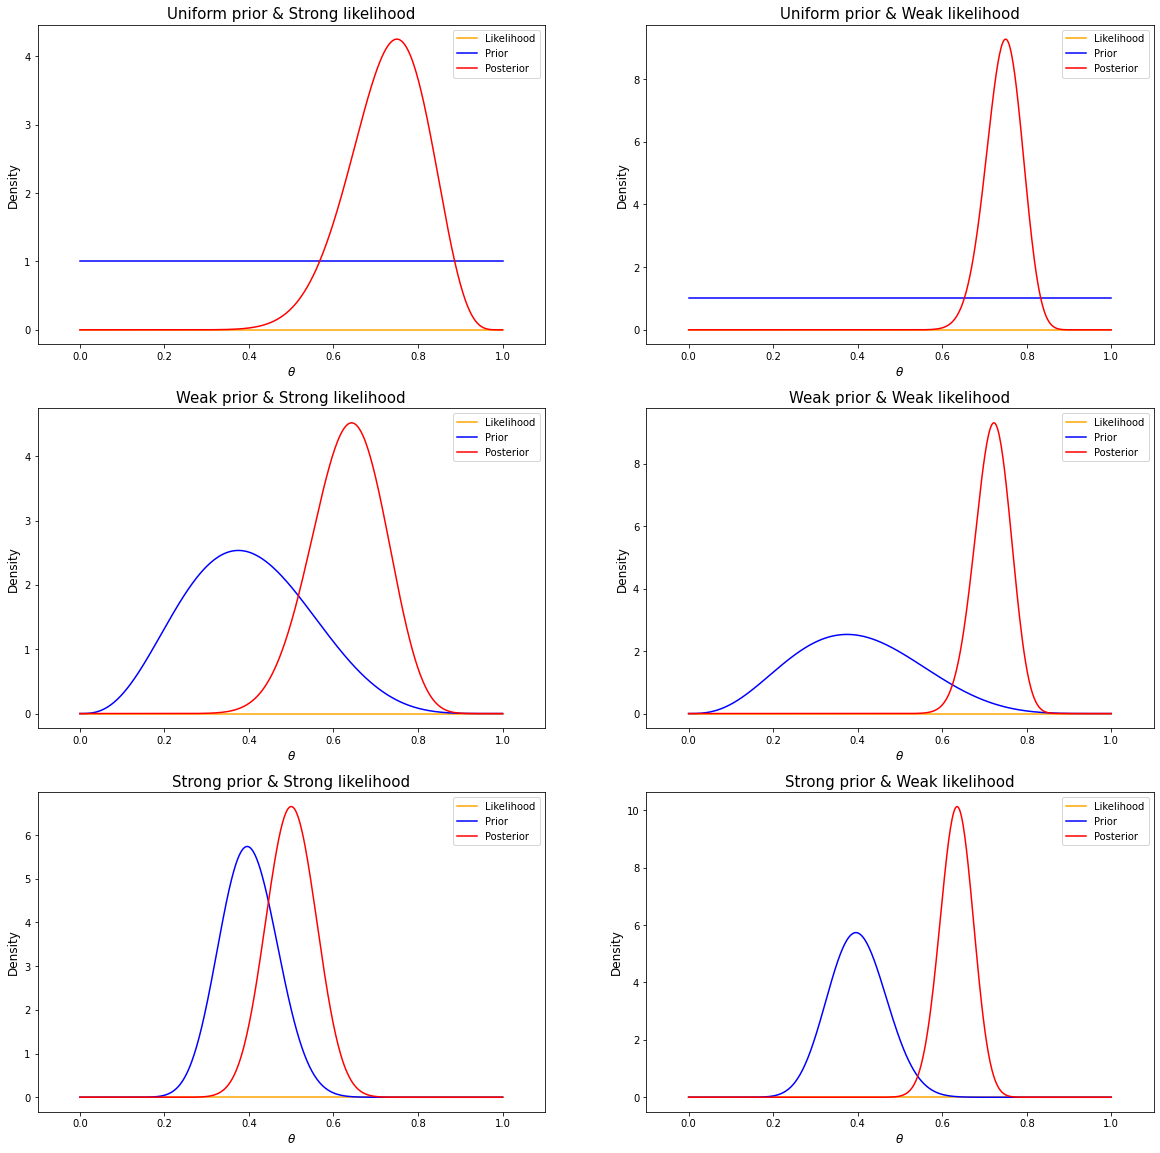

In [ ]:
fig, ax = plt.subplots(3, 2, figsize=(20,20))

for i in range(3):
    for j in range(2):
        ax[i, j].plot(thetas, likelihood(thetas, n[j], y[j]), label='Likelihood', c='orange')
        ax[i, j].plot(thetas, st.beta(a[i], b[i]).pdf(thetas), label='Prior', c='blue')
        ax[i, j].plot(thetas, st.beta(a=a[i]+y[j], b=b[i]+n[j]-y[j]).pdf(thetas), label='Posterior', c='red')
        ax[i, j].set_xlim([-0.1, 1.1])
        ax[i, j].set_title(A[i]+' & '+B[j], fontsize=15)
        ax[i, j].set_xlabel(r'$\theta$', fontsize=12)
        ax[i, j].set_ylabel('Density', fontsize=12)
        ax[i, j].legend()


확실히 prior가 세면 data가 주어져도 posterior가 prior에 가깝다. 반대로 prior가 약하면 data에서 얻은 정보와 크게 달라지지 않는, data domination이 발생한다. 

2) BDA 1.3 Exercise
Suppose that in each individual of a large population there is a pair of genes, each of which can be either x of X, that controls eye color: those with xx have blue eyes, while heterozygotes (those with Xx or xX) and those with XX have brown eyes. The proportion of blue-eyed individuals is  p2  and of heterozygotes is  2p(1−p) , where  0<p<1 . Each parent transmits one of tis own genes to the child; if a parent is a heterozygote, the probability that it transmits one of its own genes to the child; if a parent is a heterozygotes, the probability that it transmits the gene of type X is  12 . Assuming random mating, show that among brown-eyed children of brown-eyed parents, the expected proportion of heterozygotes is  2p1+2p . Suppose Judy, a brown-eyed child of brown-eyed parents, marries a heterozygote, and they have n children, all brown-eyed. Find the posterior probability that Judy is a heterozygote and the probability that her first grandchild hs blue eyes.

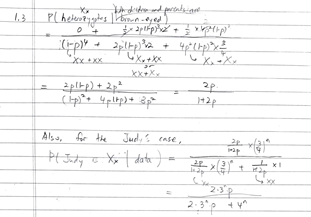

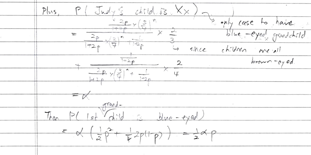

3) 새로운 대학병원에서의 high risk 수술의 생존율에 관한 분석. 다른 병원에서의 경험을 통해 생존율은  0.9  정도로 예상되며  0.8  미만이거나  0.97  초과일 것 같지는 않다고 생각한다.

3-a) \textbf{Beta} distribution으로 위의 \textbf{belief}을 survival rate에 관한 \textbf{prior distribution}으로 나타내라. Parameter  α,β 는 어떻게 선정하면 좋을 것인가? (Hint : 여러분의 믿음의 강도 따라  α,β 의 답이 달라질 수 있다. 하나의 정답을 맞추는 것이 아니라 실생활의 문제를 해석하는 힘을 기르는 것이 취지라 하겠다.)

Beta distribution에서 alpha와 beta를 바로 추측하는 것 보다 이를 통해 mode로 해석되는 omega=alpha-1 / alpha+beta-2 와 concentration으로 해석되는 kappa = alpha+beta 를 바탕으로 추축하는 것이 더우 효과적이다. 이 상황에서는 0.9정도로 예상된다고 하여, mode가 0.9가 되어야한다고 생각했고, 많은 병원들에서의 경험을 바탕으로 했다고 생각하여 concentration이 102(100근처의 값중 계산의 편의를 위해 설정)이 되도록 설정했다.
이를 만족하는 alpha와 beta는 각각 91, 11 이고 prior의 그래프는 다음과 같다.

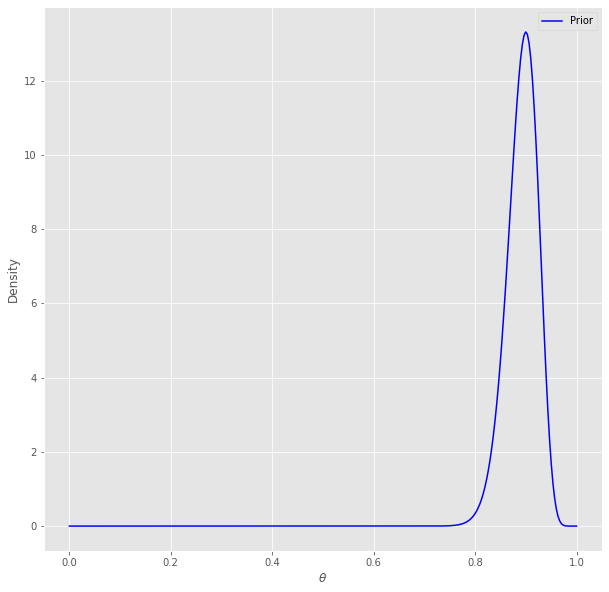

In [ ]:
thetas = np.linspace(0, 1, 300)

plt.figure(figsize=(10, 10))
plt.plot(thetas, st.beta(91, 11).pdf(thetas), label='Prior',c='blue')
plt.xlabel(r'$\theta$', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()

3-b) 이제 \textbf{data gathering}. 10명의 환자에 수술을 진행해 모두 생존하였다. survival rate에 관한 \textbf{Posterior Distribution} 구하기.

10명의 환자가 data로 들어왔다. 10명 중 10명이 모두 생존했으므로, n=10, y=10으로 볼 수 있다. conjugacy 를 이용하여 바로 data를 반영한 posterior를 구하면 다음과 같다.

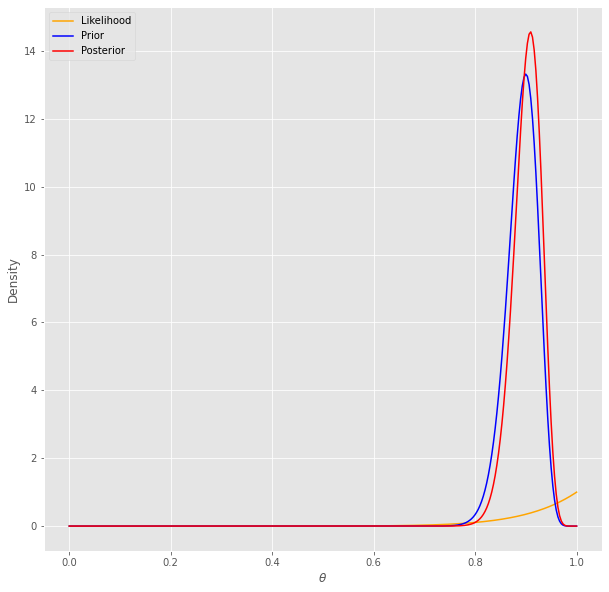

In [ ]:
thetas = np.linspace(0, 1, 300)

plt.figure(figsize=(10, 10))
plt.plot(thetas, likelihood(thetas, 10, 10), label='Likelihood', c='orange')
plt.plot(thetas, st.beta(91, 11).pdf(thetas), label='Prior', c='blue')
plt.plot(thetas, st.beta(101, 11).pdf(thetas), label='Posterior', c='red')
plt.xlabel(r'$\theta$', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()

posterior의 mode 100/110으로 prior의 mode보다 더욱 높은 값을 가진다. 이는 추가된 data에서 모든 환자들이 생존한 것을 반영한 것이다. 

3-c) 다음 환자가 생존할 확률과 다음 20명의 환자 중 2명 이상 사망할 확률을 각각 예측하시오. (Hint : Posterior Predictive)

posterior predictive을 이용하자.

수식 전개의 편의를 위해 다음과 같이 정의한다.
\begin{array}{ccc}
beta(a, b) = \Gamma(a+b)/\Gamma(a)\Gamma(b)
\end{array}

이를 활용해 계산하면 다음과 같다.
\begin{array}{ccc}
P(x_h | data) = \int_0^1{P(x_h|\theta)P(\theta|data)d\theta}
= \int_0^1{\theta^{x_h}(1-\theta)^{1-x_h}beta(101,11)\theta^{100}(1-\theta)^{10}d\theta}
= \int_0^1{\theta^{100+x_h}(1-\theta)^{11-x_h}beta(101,11)d\theta}
= beta(101,11)/beta(101+x_h,12-x_h)
\end{array}

따라서 x_h=1 즉, 생존할 확률은 beta(101,11)/beta(102, 11)=101/112=0.902 정도 이고, 
x_h=0 즉, 사망할 확률은 반대로 0.09 정도이다.

추가로, 20명의 환자 중 2명 이상 사망할 확률은 위에서 구한 확률을 바탕으로 식을 세우면 다음과 같다.
\begin{array}{ccc}
1-\int_0^1{_{20}C_{19}\theta^{19}(1-\theta)^{1}beta(101,11)\theta^{100}(1-\theta)^{10}d\theta}-\int_0^1{_{20}C_{20}\theta^{20}(1-\theta)^{0}beta(101,11)\theta^{100}(1-\theta)^{10}d\theta}
=1-20*beta(101,11)/beta(120,12)-beta(101,11)/beta(121,11)
\end{array}

따라서 식을 계산하여 구한 결과, 0.577 정도의 확률을 구할 수 있었다.

In [ ]:
# 생존할 확률
a=101/112
a

0.9017857142857143

In [7]:
# 20명의 환자 중 2명 이상 사망할 확률
import scipy.special as sc
1-20*sc.beta(120,12)/sc.beta(101,11)-sc.beta(121,11)/sc.beta(101,11)

0.5773663861763219